In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.set_index('Time', inplace=True)

In [5]:
data.drop(columns=['ESI 3', 'ESI 1', 'ESI 4', 'ESI 5'], inplace=True)

In [6]:
esi1_daily = data['ESI 2'].resample('D').sum()

In [7]:
esi1_daily_df = esi1_daily.reset_index()

In [8]:
esi1_daily_df.columns = ['Date', 'ESI 2']

In [9]:
print(esi1_daily_df)

           Date  ESI 2
0    2017-01-01     38
1    2017-01-02     31
2    2017-01-03     42
3    2017-01-04     38
4    2017-01-05     42
...         ...    ...
1456 2020-12-27     63
1457 2020-12-28     82
1458 2020-12-29     66
1459 2020-12-30     56
1460 2020-12-31     48

[1461 rows x 2 columns]


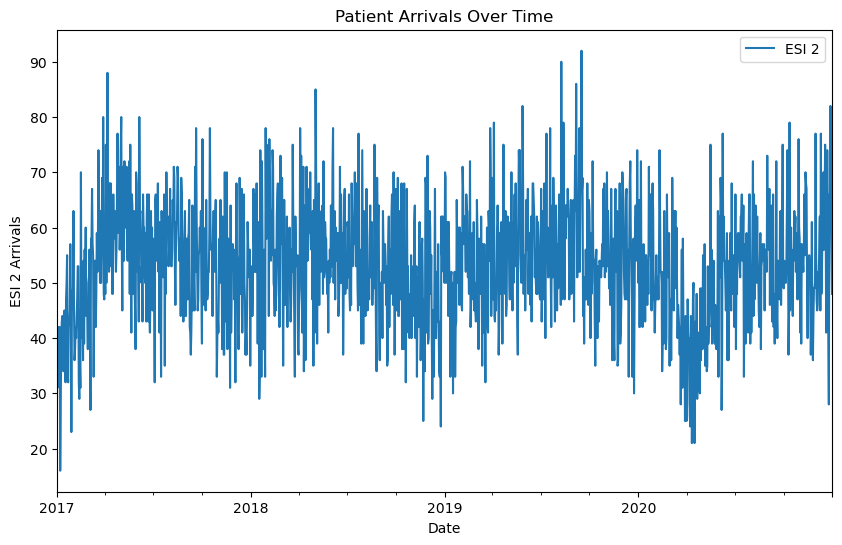

In [10]:
esi1_daily_df.plot(x='Date', y='ESI 2', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 2 Arrivals')
plt.show()

In [11]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [12]:
model = auto_arima(train['ESI 2'], seasonal=False, max_p=5, max_d=2, max_q=5, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train['ESI 2'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9835.211, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10588.003, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10321.206, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9842.261, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10586.006, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9834.722, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9839.831, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9840.583, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9835.107, Time=0.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9833.115, Time=0.33 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=9835.112, Time=0.35 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=9837.090, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=9831.437, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9838.166, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0]       

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [14]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    55.988939
1315    53.061257
1316    54.306940
1317    54.306940
1318    54.306940
          ...    
1456    54.306940
1457    54.306940
1458    54.306940
1459    54.306940
1460    54.306940
Length: 147, dtype: float64


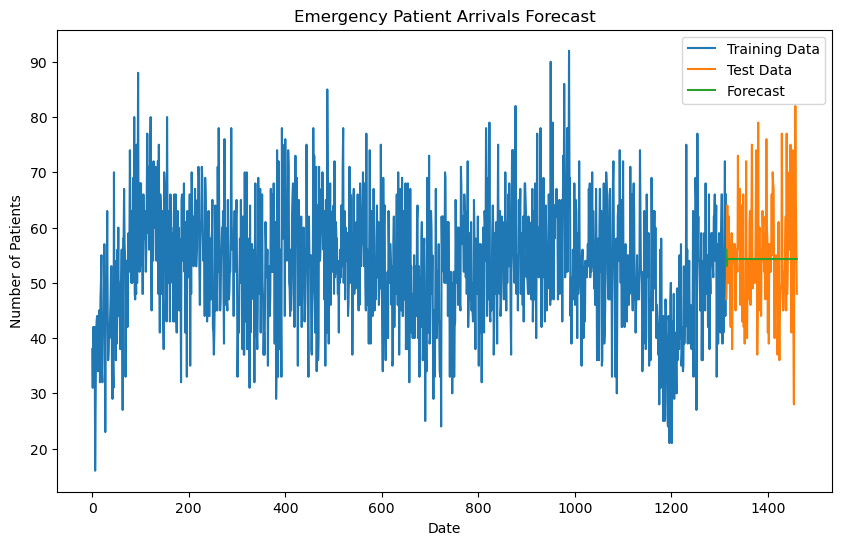

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 2'], label='Training Data')
plt.plot(test.index, test['ESI 2'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [17]:
mape = mean_absolute_percentage_error(test['ESI 2'], forecast_values)
print("MAPE:", mape)

MAPE: 14.55525977561547


In [18]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [19]:
rmse = root_mean_squared_error(test['ESI 2'], forecast_values)
print("RMSE:", rmse)

RMSE: 9.879265658187304


In [20]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 2'], forecast_values)
print("MAE:", mae)

MAE: 7.668018861488095
